In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn import linear_model

In [51]:
warnings.filterwarnings('ignore') # 避免sklearn的一些警告

In [52]:
pf = pd.read_excel(r"C:\Users\Lzumi\Desktop\比赛相关\污染源\白酒行业参数一览表.xls", sheet_name='总表',encodig='utf8')

In [53]:
pf.head()

,单位详细名称,行业名称1,行业代码1,工业总产值(当年价格)(千元),用水量（万吨）,排水量（万吨）,是否进入污水处理厂,污染类别,原料名称,产品名称,...,污染治理设施实际运行参数二名称,污染治理设施实际运行参数二数值,污染治理设施实际运行参数三名称,污染治理设施实际运行参数三数值,污染物排放量,污染物排放量计量单位,K值计算结果,K值核算填报结果,是否有监测数据,监测法核算排放量（吨）
0,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000297,吨,1.0,1.0,/,NaN
1,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000015,吨,1.0,1.0,/,NaN
2,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000004,吨,1.0,1.0,/,NaN
3,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000001,吨,1.0,1.0,/,NaN
4,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废气,柴油,蒸汽/热水/其他,...,NaN,NaN,NaN,NaN,0.004330,吨,NaN,1.0,/,NaN


In [54]:
pf.shape

(14384, 36)

#  特征分析和提取

In [55]:
np.where(pf.isnull().sum()/pf.shape[0]<0.5 )[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 30, 31, 33, 34], dtype=int64)

In [56]:
object_col = ['污染类别','原料名称','产品名称', '工艺名称', '生产规模等级','污染物名称','污染物处理工艺名称']  # 需要做labelencoder的列
data = pf[['污染类别','原料名称','产品名称', '工艺名称', '生产规模等级','污染物名称','污染物处理工艺名称']]
for i in object_col:
    lbl = LabelEncoder()
    data[i] = lbl.fit_transform(data[i].astype(str))
    data[i] = data[i]
data.head()

,污染类别,原料名称,产品名称,工艺名称,生产规模等级,污染物名称,污染物处理工艺名称
0,1,11,2,6,1,1,11
1,1,11,2,6,1,4,11
2,1,11,2,6,1,6,11
3,1,11,2,6,1,5,11
4,0,6,10,7,4,7,0


In [57]:
pf['污染物去除效率']= pf['污染物去除效率'].apply(lambda x: float(x.split('%')[0])*0.01)

In [58]:
train  = pf[['工业总产值(当年价格)(千元)']]
train['用水量（万吨）'] = pf['用水量（万吨）'].apply(lambda x: 0 if x=='/' else x)
train['排水量（万吨）'] = pf['排水量（万吨）'].apply(lambda x: 0 if x=='/' else x)
train['是否进入污水处理厂']= pf['是否进入污水处理厂'].map(lambda x: int(x!='/'))
train['原料/燃料用量'] = pf['原料/燃料用量'].apply(lambda x: 0 if np.isnan(x) else x)
train['污染物产生量'] = pf['污染物产生量']
train['污染物去除效率'] = pf['污染物去除效率']
columns = ['工业总产值(当年价格)(千元)', '用水量（万吨）','排水量（万吨）', '是否进入污水处理厂', '原料/燃料用量','污染物产生量','污染物去除效率']
train.head()

,工业总产值(当年价格)(千元),用水量（万吨）,排水量（万吨）,是否进入污水处理厂,原料/燃料用量,污染物产生量,污染物去除效率
0,20.0,0.007,0.0063,1,0.000,0.014232,0.9791
1,20.0,0.007,0.0063,1,0.000,0.000144,0.8957
2,20.0,0.007,0.0063,1,0.000,0.000040,0.8988
3,20.0,0.007,0.0063,1,0.000,0.000028,0.9737
4,20.0,0.007,0.0063,1,1.429,0.004330,0.0000


In [59]:
train = pd.concat([train,data],axis=1)

In [60]:
train['污染物排放量'] = pf['污染物排放量']

In [61]:
train.head()

,工业总产值(当年价格)(千元),用水量（万吨）,排水量（万吨）,是否进入污水处理厂,原料/燃料用量,污染物产生量,污染物去除效率,污染类别,原料名称,产品名称,工艺名称,生产规模等级,污染物名称,污染物处理工艺名称,污染物排放量
0,20.0,0.007,0.0063,1,0.000,0.014232,0.9791,1,11,2,6,1,1,11,0.000297
1,20.0,0.007,0.0063,1,0.000,0.000144,0.8957,1,11,2,6,1,4,11,0.000015
2,20.0,0.007,0.0063,1,0.000,0.000040,0.8988,1,11,2,6,1,6,11,0.000004
3,20.0,0.007,0.0063,1,0.000,0.000028,0.9737,1,11,2,6,1,5,11,0.000001
4,20.0,0.007,0.0063,1,1.429,0.004330,0.0000,0,6,10,7,4,7,0,0.004330


In [64]:
train[['污染物排放量']].info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14384 entries, 0 to 14383
Data columns (total 1 columns):
污染物排放量    11911 non-null float64
dtypes: float64(1)
memory usage: 112.5 KB


# 样本外点检测

In [66]:
import matplotlib.pyplot as plt
#绘制箱线图
plt.boxplot(train[['工业总产值(当年价格)(千元)', '原料/燃料用量', '污染物排放量']])
plt.xlabel("特征索引")
plt.ylabel("四分位间距")
plt.show()

KeyboardInterrupt: 

# 信息熵

In [13]:
from math import log
 
def calcShannonEnt(dataSet):
    numEntries = len(dataSet) # 样本数
    labelCounts = {} # 该数据集每个类别的频数
    for featVec in dataSet:  # 对每一行样本
        currentLabel = featVec[-1] # 该样本的标签
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1 
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries # 计算p(xi)
        shannonEnt -= prob * log(prob, 2)  # log base 2
    return shannonEnt

print(calcShannonEnt(pf))

0.030057322720309997


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019674EBFEB8>,
      dtype=object)

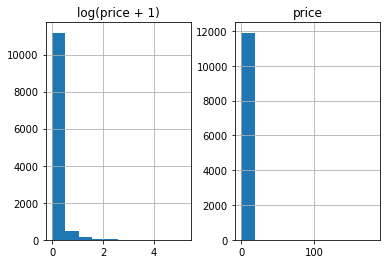

In [14]:
%matplotlib inline
emission = pd.DataFrame({"price":train["污染物排放量"], "log(price + 1)":np.log1p(train["污染物排放量"])})
emission.hist()

In [15]:
train['工业总产值(当年价格)(千元)'].dtypes


dtype('float64')

In [16]:
train['用水量（万吨）'].dtypes

dtype('float64')

In [17]:
train['排水量（万吨）'].dtypes

dtype('float64')

In [18]:
train['是否进入污水处理厂'].dtypes

dtype('int64')

In [19]:
train['原料/燃料用量'].dtypes

dtype('float64')

In [20]:
pf['污染物产生量'].isnull().sum()

1813

In [67]:
import matplotlib.pyplot as plt

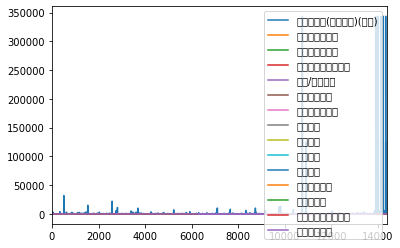

In [81]:
X = np.array(train)[:,0:-1]
y = np.array(train)[:, -1]

ValueError: x and y must be the same size

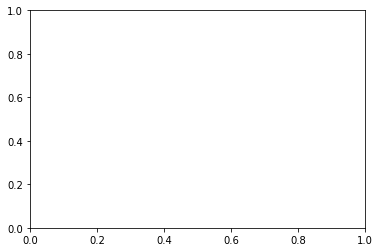

In [80]:
plt.scatter(X, y, marker='x')
# 绘制x轴和y轴坐标
plt.xlabel("x")
plt.ylabel("y")

# 显示图形

plt.show()

In [83]:
train_end = train[~train['污染物排放量'].isnull()]
train_end.shape

(11911, 15)

In [84]:
test_end = train[train['污染物排放量'].isnull()]
test_end.shape

(2473, 15)

In [85]:
test_end.head()

,工业总产值(当年价格)(千元),用水量（万吨）,排水量（万吨）,是否进入污水处理厂,原料/燃料用量,污染物产生量,污染物去除效率,污染类别,原料名称,产品名称,工艺名称,生产规模等级,污染物名称,污染物处理工艺名称,污染物排放量
6323,40.5,0.0030,0.0018,0,10.000,NaN,0.0,0,0,10,1,4,2,0,NaN
6327,40.5,0.0030,0.0018,0,0.000,NaN,0.0,1,11,2,6,1,3,0,NaN
6332,20.0,0.0100,0.0060,0,0.054,NaN,0.0,0,4,10,7,4,2,0,NaN
6335,20.0,0.0100,0.0060,0,0.000,NaN,0.0,1,11,13,5,1,3,0,NaN
6340,30.0,0.0012,0.0008,0,4.800,NaN,0.0,0,8,8,12,4,2,0,NaN


# 模型

In [86]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,roc_auc_score

In [87]:
X_train,X_test,y_train,y_test = train_test_split(train_end.iloc[:,:-1],train_end.iloc[:,-1],test_size=0.3)

In [95]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 参数
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
print('开始训练...')
# 训练
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('开始预测...')
# 预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# 评估
print('预估结果的rmse为:')
print(mean_squared_error(y_test, y_pred) ** 0.5)

开始训练...
[1]	valid_0's l2: 0.719849	valid_0's auc: 0.670622
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.666061	valid_0's auc: 0.677492
[3]	valid_0's l2: 0.618623	valid_0's auc: 0.677843
[4]	valid_0's l2: 0.576642	valid_0's auc: 0.678737
[5]	valid_0's l2: 0.539928	valid_0's auc: 0.680945
[6]	valid_0's l2: 0.501064	valid_0's auc: 0.680279
[7]	valid_0's l2: 0.468204	valid_0's auc: 0.68063
[8]	valid_0's l2: 0.440639	valid_0's auc: 0.693739
[9]	valid_0's l2: 0.416098	valid_0's auc: 0.693371
[10]	valid_0's l2: 0.395834	valid_0's auc: 0.6926
[11]	valid_0's l2: 0.383324	valid_0's auc: 0.693336
[12]	valid_0's l2: 0.372574	valid_0's auc: 0.689901
[13]	valid_0's l2: 0.362015	valid_0's auc: 0.690147
Early stopping, best iteration is:
[8]	valid_0's l2: 0.440639	valid_0's auc: 0.693739
开始预测...
预估结果的rmse为:
0.6638063105759584


In [94]:
pd.DataFrame({"预测值":y_pred,"实际值":y_test})

,预测值,实际值
2743,0.155832,0.002466
3674,0.163467,0.028217
1476,0.155832,0.000015
1709,0.155832,0.000280
2384,0.155832,0.004760
7874,0.426648,0.792250
9178,1.404093,2.233007
2041,0.156845,0.008636
4834,0.168795,0.038793
524,0.155832,0.001500


,工业总产值(当年价格)(千元),用水量（万吨）,排水量（万吨）,是否进入污水处理厂,原料/燃料用量,污染物产生量,污染物去除效率,污染类别,原料名称,产品名称,工艺名称,生产规模等级,污染物名称,污染物处理工艺名称,污染物排放量
6323,40.5,0.0030,0.0018,0,10.000,NaN,0.0,0,0,10,1,4,2,0,NaN
6327,40.5,0.0030,0.0018,0,0.000,NaN,0.0,1,11,2,6,1,3,0,NaN
6332,20.0,0.0100,0.0060,0,0.054,NaN,0.0,0,4,10,7,4,2,0,NaN
6335,20.0,0.0100,0.0060,0,0.000,NaN,0.0,1,11,13,5,1,3,0,NaN
6340,30.0,0.0012,0.0008,0,4.800,NaN,0.0,0,8,8,12,4,2,0,NaN
6342,30.0,0.0012,0.0008,0,0.000,NaN,0.0,1,11,2,6,1,3,0,NaN
6349,1.0,0.0001,0.0001,1,0.300,NaN,0.0,0,8,8,12,4,2,0,NaN
6353,80.0,0.0090,0.0042,0,0.160,NaN,0.0,0,4,8,12,4,2,0,NaN
6354,80.0,0.0090,0.0042,0,0.000,NaN,0.0,1,11,2,6,1,3,0,NaN
6361,120.0,0.0048,0.0012,0,10.000,NaN,0.0,0,5,10,1,4,2,0,NaN
